In [ ]:
!pip install darts

In [3]:
import numpy as np
import pandas as pd
from darts import TimeSeries
import matplotlib.pyplot as plt
import statsmodels.api as sm


$$X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \ldots + \phi_p X_{t-p} + \varepsilon_t$$


El modelo ARMA(p,q) se define generalmente como:

$$
X_t = c + \varepsilon_t + \sum_{i=1}^{p} \phi_i X_{t-i} + \sum_{j=1}^{q} \theta_j \varepsilon_{t-j}
$$

Donde $ \varepsilon_t $ es un ruido blanco.

Cuando implementamos este modelo usando arma\_generate\_sample, los coeficientes AR y MA se definen de la siguiente manera:

$$
AR = [1, -\phi_1, -\phi_2, \ldots, -\phi_p]
$$

$$
MA = [1, \theta_1, \theta_2, \ldots, \theta_q]
$$

El primer término de cada lista (el "1") es simplemente una convención en statsmodels y no se refiere a un coeficiente real en la ecuación ARMA.

Por eso, para un modelo ARMA(0,2) (que es esencialmente un modelo MA(2) sin términos AR), definimos ar = [1] (sin términos AR) y ma con tres valores, donde el primero es 1 y los otros dos son los coeficientes MA.


In [4]:
np.random.seed(0)
ar = np.array([1, 0.7, -0.2])  # AR terms (Changed from the MA terms)
ma = np.array([1])  # No MA terms
simulated_data_ar2 = sm.tsa.arma_generate_sample(ar=ar, ma=ma, nsample=1000)


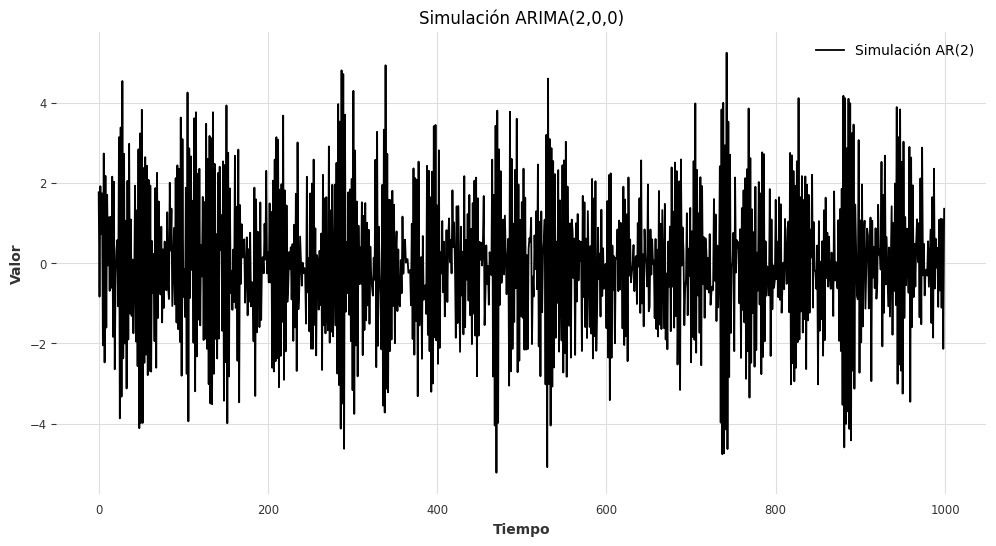

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(simulated_data_ar2, label='Simulación AR(2)')
plt.legend()
plt.title("Simulación ARIMA(2,0,0)")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.show()

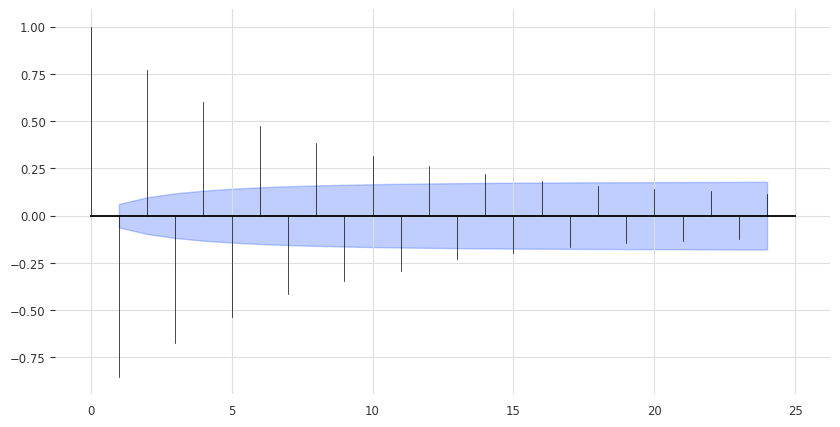

In [7]:
time_index = pd.date_range(start="2023-01-01", periods=1000, freq='D')

# Convert the simulated data to a darts TimeSeries
simulated_series_darts_ar2 = TimeSeries.from_times_and_values(time_index, simulated_data_ar2)

# Plot the autocorrelation function using Darts
from darts.utils.statistics import plot_acf

plot_acf(simulated_series_darts_ar2)

La función de autocorrelación no tiene forma explicita

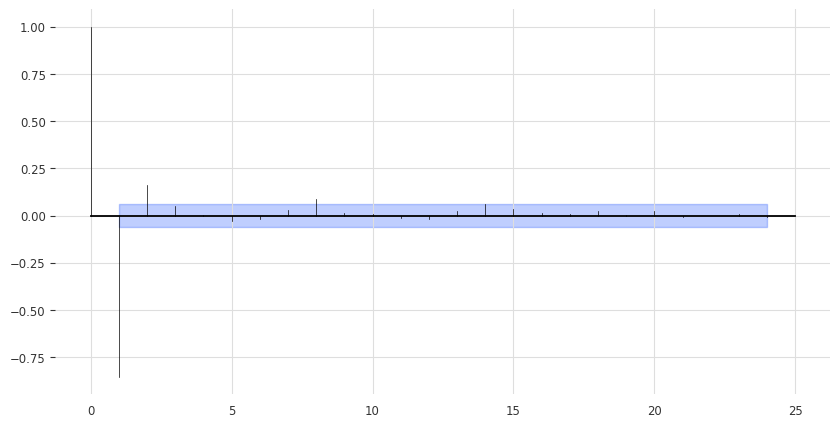

In [8]:
from darts.utils.statistics import plot_pacf

plot_pacf(simulated_series_darts_ar2)

In [11]:
from darts.models import ARIMA
model = ARIMA(p=2, d=0, q=0)
model.fit(simulated_series_darts_ar2)

ARIMA(p=2, d=0, q=0, seasonal_order=(0, 0, 0, 0), trend=None, random_state=None, add_encoders=None)

In [12]:
underlying_model = model.model

# Obtener y mostrar los parámetros estimados
estimated_params = underlying_model.params
print(estimated_params)

[-0.03087895 -0.71523828  0.16174665  0.96962392]
